# ANN for make simulation and make prediction in physics

# import working liberary

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import load_model
import numpy as np

# global variables

In [32]:
# input variable to program
import os
# Get the name of the Excel file
#excel_files = [f for f in os.listdir('.') if f.endswith('.xlsx')]
excel_files = [f for f in os.listdir('.') if (f.endswith('.xlsx') and (not f.startswith('out')))]
inputFile = excel_files[0]   # 'All data mesons+baryons.xlsx'
inputSheetName = 'Sheet1' 
print("input file : ",inputFile)


input file :  collect data_ka+.xlsx


# read data

In [33]:
# Read the data from the excel file
data_all = pd.read_excel(inputFile,sheet_name=inputSheetName)
temp_data_all = data_all[data_all['spectrum']<60]
data =temp_data_all.reset_index(drop=True)

# Split the data into input and output variables
X = data[['mass','s','N part','Pt']]
y = data['spectrum'].to_frame('spectrum')

print(X.head)
print(y.head)

<bound method NDFrame.head of           mass     s  N part     Pt
0     0.493677   7.7     337  0.275
1     0.493677   7.7     337  0.325
2     0.493677   7.7     337  0.375
3     0.493677   7.7     337  0.425
4     0.493677   7.7     337  0.475
...        ...   ...     ...    ...
1119  0.493677  39.0      14  1.550
1120  0.493677  39.0      14  1.650
1121  0.493677  39.0      14  1.750
1122  0.493677  39.0      14  1.850
1123  0.493677  39.0      14  1.950

[1124 rows x 4 columns]>
<bound method NDFrame.head of       spectrum
0      13.6987
1      12.8034
2      11.6616
3      10.2608
4       9.0296
...        ...
1119    0.0054
1120    0.0037
1121    0.0025
1122    0.0018
1123    0.0011

[1124 rows x 1 columns]>


# normaliz input

In [34]:
# Normalize the input
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
# Fit the scaler to the input data and transform it
X_normalized = scaler.fit_transform(X)
# Print the normalized input data
print('X_normalized')
print(X_normalized)
X_train = X_normalized
#X_train = X
print('X_train')
print(X_train) 


X_normalized
[[ 0.         -0.76774194  1.21505376 -0.54545455]
 [ 0.         -0.76774194  1.21505376 -0.48484848]
 [ 0.         -0.76774194  1.21505376 -0.42424242]
 ...
 [ 0.          1.2516129  -0.52150538  1.24242424]
 [ 0.          1.2516129  -0.52150538  1.36363636]
 [ 0.          1.2516129  -0.52150538  1.48484848]]
X_train
[[ 0.         -0.76774194  1.21505376 -0.54545455]
 [ 0.         -0.76774194  1.21505376 -0.48484848]
 [ 0.         -0.76774194  1.21505376 -0.42424242]
 ...
 [ 0.          1.2516129  -0.52150538  1.24242424]
 [ 0.          1.2516129  -0.52150538  1.36363636]
 [ 0.          1.2516129  -0.52150538  1.48484848]]


# loada saved model

In [35]:
# Load the saved model

# Rename the out model
""" modelName =str.split(inputFile,'.')[0]  + '.h5'
modelName = str.replace(modelName,' ','_')
modelName = str.replace(modelName,'+','_plus_')
modelName = str.replace(modelName,'-','_Negativ_')
print('modelName is : ',modelName) """

# load the saved model
modelNames = [f for f in os.listdir('.') if (f.endswith('.h5'))]
modelName = modelNames[0]
myepochs = int(100) 
mybatchSize = int(16)
model = load_model(modelName)
#configure output parameters
outputFile = 'out_- '+modelName+' .xlsx'
summaryOutFile = modelName + ' - Summary .txt'
outputSheetName = 'predicat_ '+modelName+' '
nameFigImg = 'fig_in4_ '+modelName+' .png'

# define the model - compile - fit - save

In [36]:

''' Define the model '''
""" # Define the model
model = Sequential(name=modelName)
# Add the first dense layer
model.add(Dense(40, input_dim=4, activation='relu'))

# Add batch normalization
#model.add(BatchNormalization())
model.add(Dense(40, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))

# Add the output layer
model.add(Dense(1))

''' # compile the model      '''
# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer)

''' train the model & save current compiled model  '''
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=myepochs, batch_size=mybatchSize) 
# Save the model
model.save(modelName)


 """

" # Define the model\nmodel = Sequential(name=modelName)\n# Add the first dense layer\nmodel.add(Dense(40, input_dim=4, activation='relu'))\n\n# Add batch normalization\n#model.add(BatchNormalization())\nmodel.add(Dense(40, activation='relu'))\n#model.add(BatchNormalization())\nmodel.add(Dense(80, activation='relu'))\nmodel.add(Dense(80, activation='relu'))\nmodel.add(Dense(40, activation='relu'))\nmodel.add(Dense(40, activation='relu'))\n\n# Add the output layer\nmodel.add(Dense(1))\n\n''' # compile the model      '''\n# Compile the model with Levenberg-Marquardt optimizer\noptimizer = RMSprop(learning_rate=0.001, rho=0.001,)\nmodel.compile(loss='mean_squared_error', optimizer=optimizer)\n\n''' train the model & save current compiled model  '''\n# Train the model\n#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)\nmodel.fit(X_train, y, epochs=myepochs, batch_size=mybatchSize) \n# Save the model\nmodel.save(modelName)\n\n\n "

# Evaluate the model and make prediction 

In [37]:
from sklearn.metrics import mean_squared_error

# Make predictions on new data
X_test =pd.DataFrame(X_train) #scaler.transform(X)
#X_test = scaler.fit_transform(X)
print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = pd.Series(predictions)
predictions = predictions.to_frame('predictions')
print("predictions is : ")
print(predictions)

# Evaluate the model
score = model.evaluate(X_test, y)
print("score " , score)
print(score)
mse = mean_squared_error(y,predictions)
print('mse' , mse)


new_data is : 
        0         1         2         3
0     0.0 -0.767742  1.215054 -0.545455
1     0.0 -0.767742  1.215054 -0.484848
2     0.0 -0.767742  1.215054 -0.424242
3     0.0 -0.767742  1.215054 -0.363636
4     0.0 -0.767742  1.215054 -0.303030
...   ...       ...       ...       ...
1119  0.0  1.251613 -0.521505  1.000000
1120  0.0  1.251613 -0.521505  1.121212
1121  0.0  1.251613 -0.521505  1.242424
1122  0.0  1.251613 -0.521505  1.363636
1123  0.0  1.251613 -0.521505  1.484848

[1124 rows x 4 columns]
36/36 [==============================] - 0s 1ms/step
predictions is : 
      predictions
0       15.117493
1       13.491232
2       11.968783
3       10.573461
4        9.220000
...           ...
1119    -0.011859
1120    -0.020140
1121    -0.028422
1122    -0.037146
1123    -0.046676

[1124 rows x 1 columns]
36/36 [==============================] - 0s 2ms/step - loss: 0.0510
score  0.05097341164946556
0.05097341164946556
mse 0.050973428365157836


# draw 

shape of datap (1124, 8)
data : 
           mass     s  N part     Pt  spectrum     err1     err2
0     0.493677   7.7     337  0.275   13.6987  0.12119  0.89825
1     0.493677   7.7     337  0.325   12.8034  0.09993  0.79262
2     0.493677   7.7     337  0.375   11.6616  0.08412  0.70047
3     0.493677   7.7     337  0.425   10.2608  0.07120  0.60710
4     0.493677   7.7     337  0.475    9.0296  0.06125  0.53268
...        ...   ...     ...    ...       ...      ...      ...
1119  0.493677  39.0      14  1.550    0.0054  0.00009  0.00047
1120  0.493677  39.0      14  1.650    0.0037  0.00007  0.00033
1121  0.493677  39.0      14  1.750    0.0025  0.00006  0.00023
1122  0.493677  39.0      14  1.850    0.0018  0.00004  0.00016
1123  0.493677  39.0      14  1.950    0.0011  0.00003  0.00010

[1124 rows x 7 columns]
pred 
        predictions
0       15.117493
1       13.491232
2       11.968783
3       10.573461
4        9.220000
...           ...
1119    -0.011859
1120    -0.020140
112

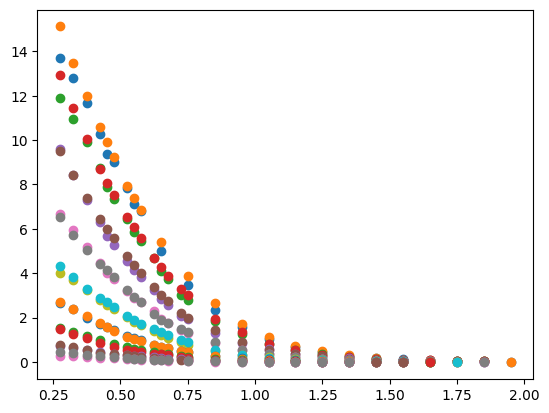

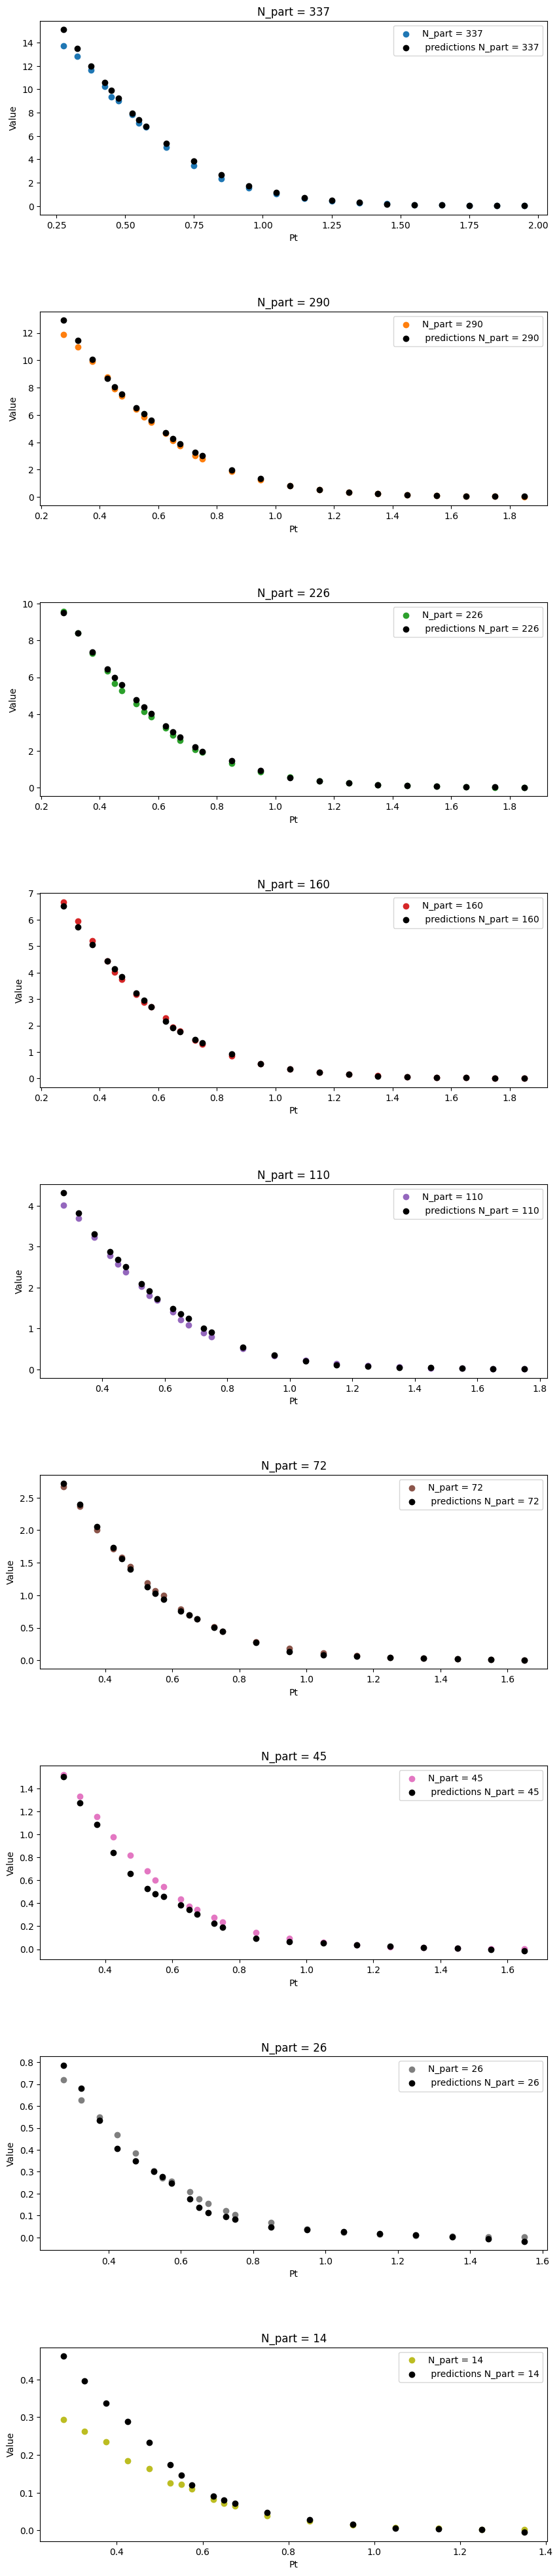

In [38]:
# for drawing in 2d i choose Pt as x-axis
error = data['spectrum'] - predictions['predictions']
error = error.to_frame('error')
#print('shape of data' , data.shape)
#print('shape of pred' , predictions.shape)
#datap = pd.concat([data,predictions],axis=1)
datap = pd.merge(data,predictions,left_index=True, right_index=True)
print('shape of datap',datap.shape)

print('data : \n',data)
print('pred \n ',predictions)
print('datap \n',datap)

# xap : data
xap = pd.DataFrame(datap)
# xapf : xap after filteration
xapf= pd.DataFrame(datap)
#xapf = xapf[xapf['mass']==0.13957] # only activate it in all mass at xlsx file
xapf = xapf[xapf['s']==7.7]
#xapf = xapf[xapf['N part']==337]

N_Part_Values  =xapf['N part'].unique() #xap['N part'].unique() # xapf['N part'].unique()
print('Npart values : \n')
for n in N_Part_Values:
    print('N is : ',n)
print('Npart values : \n',N_Part_Values)
dataGraph1 = pd.merge(xapf['Pt'],xapf['predictions'],left_index=True, right_index=True)
print('datagraph1 : \n',dataGraph1)
dataGraph = pd.merge(dataGraph1,xapf['spectrum'],left_index=True, right_index=True)
print('dataGraph : \n', dataGraph)
print('shape of dataGraph',dataGraph.shape)
# Plot the data and predictions
mergedData = pd.merge(dataGraph,xapf['N part'],left_index=True, right_index=True)
print('merged data is : \n',mergedData)
#plt.semilogy(xapf['Pt'], xapf['spectrum']   ,'bo', label='Actual')
#plt.semilogy(xapf['Pt'], xapf['predictions'],'ro', label='Predicted')
for n in N_Part_Values:
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['spectrum'][mergedData['N part']==n])
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['predictions'][mergedData['N part']==n])
    
    #print('n test :\n',mergedData['Pt'][mergedData['N part']==n])
plt.savefig("fig-all-"+nameFigImg)
##########
#import matplotlib.pyplot as plt
# Define the list ofValues and plot the data for each iteration
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=len(N_Part_Values), ncols=1, figsize=(10, 50))

#fig, axs = plt.subplots(N_Part_Values.size,1)
for i, n in enumerate(N_Part_Values):
    # Plot the 'Pt' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['spectrum'][mergedData['N part'] == n], 
                 color='C{}'.format(i), 
                 label='N_part = {}'.format(n))

    # Plot the 'predictions' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['predictions'][mergedData['N part'] == n], 
                 color='black', 
                  label=' predictions N_part = {}'.format(n))
                 #label='_nolegend_')

    # Add a legend and axis labels to the subplot
    axs[i].legend()
    axs[i].set_xlabel('Pt')
    axs[i].set_ylabel('Value')
    axs[i].set_title('N_part = {}'.format(n))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.savefig(nameFigImg)
plt.show()


# write output to excel 

In [39]:
# Write predictions , data to Excel file
err1=data['err1'].to_frame('err1')
err2=data['err2'].to_frame('err2')
#SquareErrorForEachPoint = np.sqrt( ((datap['predictions']- datap['Spectrum'])/(err1- err2)))
SquareErrorForEachPoint =np.square( (datap['predictions']- datap['spectrum'])/(err1['err1']+ err2['err2']))

SquareErrorForEachPoint = pd.Series(SquareErrorForEachPoint)
SquareErrorForEachPoint = SquareErrorForEachPoint.to_frame('SquareErrorForEachPoint')
print('Square error for each point : ',SquareErrorForEachPoint)

outputpredicat = pd.concat([datap, SquareErrorForEachPoint], axis=1)
mysum =outputpredicat['SquareErrorForEachPoint'].sum()
mycount =(outputpredicat['SquareErrorForEachPoint'].count()) -1
rmse = np.sqrt(mysum/mycount)

#rmse = np.sqrt (np.average(outputpredicat['SquareErrorForEachPoint']))
rmse = pd.Series(rmse)
#rmse = pd.DataFrame({'rmse': rmse})
print('RMSE',rmse)

# output is data frame
#print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    rmse.to_excel(writer, sheet_name='RMSE', index=False)


Square error for each point :        SquareErrorForEachPoint
0                    1.936933
1                    0.593881
2                    0.153289
3                    0.212472
4                    0.102770
...                       ...
1119               949.810787
1120              3552.303671
1121             11369.603684
1122             37920.342734
1123            135063.602735

[1124 rows x 1 columns]
RMSE 0    21.67699
dtype: float64


d:\Repos\ReposEda\DrSamahPrjs\ANN\ANN\.venv\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


# print model summery 

In [40]:

print("End")
#print("accuracy :" + str(accuracy))
print("score " + str(score))
SummaryOut = model.summary()
print(SummaryOut)

from io import StringIO
# summarize the model
with StringIO() as buf:
    model.summary(print_fn=lambda x: buf.write(x + '\n'))
    summary = buf.getvalue()

with open(modelName +'-summary.txt', 'w') as f:
    f.write(summary)


print(summary)
print(modelName)
print('RMSE',rmse)



End
score 0.05097341164946556
Model: "collect_data_ka_plus_.h5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                200       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 80)                3280      
                                                                 
 dense_3 (Dense)             (None, 80)                6480      
                                                                 
 dense_4 (Dense)             (None, 40)                3240      
                                                                 
 dense_5 (Dense)             (None, 40)                1640      
                                                                 
 dense_6 (De